# **Data Science Salaries**

# 1. **Install necessary libraries**

Description:
The dataset comprises anonymized data on salaries in the data science field, capturing various aspects such as experience level, employment type, and job title.
This dataset can be utilized for analyzing salary trends in data science, including variations across job titles, locations, and experience levels.
The dataset contains categorical data, which we'll use to display the required graphs.

In [1]:

from IPython.display import clear_output

#install wordcloud
!pip install wordcloud

#install pywaffle
!pip install pywaffle

#install dash
!pip install dash

#install plotly
!pip install plotly

# Clears the current output
clear_output(wait=False)

# 2. Import Basic Python Libraries for Data Manipualtion and Visualizations

In [2]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import zipfile

%matplotlib inline


#3. **Download the dataset directly from Kaggle.**
   ## For simplicity,  We first have to install kaggle API and download the Data Science Salaries dataset from the website

In [3]:
!pip install kaggle
!kaggle datasets download -d yusufdelikkaya/datascience-salaries-2024

# Clears the current output
clear_output(wait=False)

## Since the downloaded file is in zip format we extracted the csv file from the zip file to a specific ***directory*** named extracted_files using the following code .

In [4]:
# Extract the zip file
with zipfile.ZipFile("datascience-salaries-2024.zip", 'r') as zip_ref:
  zip_ref.extractall("extracted_files")  # Extract to a specific directory


## Read the CSV file

In [5]:

# Read the CSV file
csv_file_path = "/content/extracted_files/DataScience_salaries_2024.csv"
df = pd.read_csv(csv_file_path)

## Check the first 5 rows of the DataFrame

In [6]:
# check the first 5 rows of the DataFrame
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


## Check datatypes
## Check if our dataset has any empty rows using .info()

In [7]:
# check datatypes
# check if our dataset has any empty rows using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


## The dataframe does not have any empty rows.

Since the dataset contains anonymous data and lacks unique values to differentiate entries, it includes many repetitions that are not true duplicates.
To demonstrate this, let's print the duplicated rows.

In [8]:
# Find duplicate rows
duplicates = df.duplicated()

# Print rows that are duplicates
print(df[duplicates])

       work_year experience_level employment_type                   job_title  \
72          2024               MI              FT  Machine Learning Scientist   
84          2024               MI              FT           Research Engineer   
93          2024               SE              FT   Machine Learning Engineer   
97          2024               SE              FT          Research Scientist   
105         2024               MI              FT           Research Engineer   
...          ...              ...             ...                         ...   
14787       2022               MI              FT               Data Engineer   
14792       2024               EN              FT                Data Analyst   
14793       2024               EN              FT                Data Analyst   
14794       2024               EN              FT                Data Analyst   
14796       2023               EN              FT                Data Analyst   

       salary salary_curren

## Let's now check all the job titles that are present in our dataset using .value_counts()

In [9]:
# let's check all the job titles that are present in our dataset using .value_counts()
print(df.job_title.value_counts())

job_title
Data Engineer                      3162
Data Scientist                     3015
Data Analyst                       2189
Machine Learning Engineer          1542
Research Scientist                  475
                                   ... 
Deep Learning Researcher              1
Big Data Developer                    1
AWS Data Architect                    1
Staff Machine Learning Engineer       1
CRM Data Analyst                      1
Name: count, Length: 153, dtype: int64


In [10]:
df['job_title_distict']=df['job_title']

## List of valid job titles (we will use job titles that have high number of records )

In [11]:

# List of valid job titles (we will use job titles that have high number of records )
valid_job_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst',"Machine Learning Engineer"]

# Update job_title to "Other" where it is not in valid_job_titles
df['job_title'] = df['job_title'].apply(lambda x: "Other" if x not in valid_job_titles else x)


## change the name for ease of use

In [12]:
# change the name for ease of use
df["job_title"].replace("Machine Learning Engineer","ML Engineer",inplace=True)

<ipython-input-12-f2fbf6065485>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["job_title"].replace("Machine Learning Engineer","ML Engineer",inplace=True)


## Let's now check the new job titles using .value_counts()

In [13]:
# let's now check the new job titles using .value_counts()
df['job_title'].value_counts()

,count
job_title,
Other,4930
Data Engineer,3162
Data Scientist,3015
Data Analyst,2189
ML Engineer,1542


## Double check the dataframe to confirm if all the changes were successful

In [14]:
# double check the dataframe to confirm if all the changes were successful
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_distict
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L,Data Scientist
1,2021,MI,FT,Other,11000000,HUF,36259,HU,50,US,L,BI Data Analyst
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,Data Scientist
3,2021,MI,FT,Other,8500000,JPY,77364,JP,50,JP,S,ML Engineer
4,2022,SE,FT,Other,7500000,INR,95386,IN,50,IN,L,Lead Machine Learning Engineer


# 3. Plotting pie chart from pandas dataframe directly

Let's plot a pie chart directly in pandas to display the distribution of the job titles

In [15]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

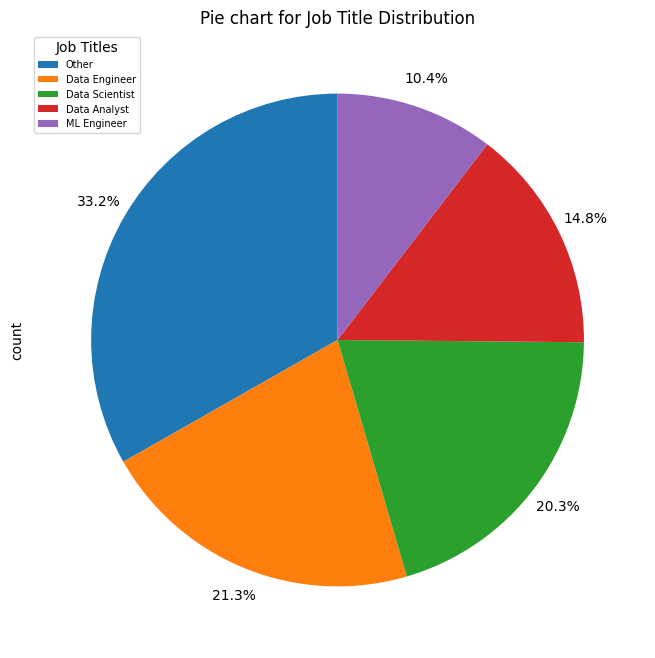

In [16]:
plt.figure(figsize=(8, 8))
df['job_title'].value_counts().plot.pie(

    labels=[''] * df['job_title'].nunique(),
    autopct='%1.1f%%',
    pctdistance=1.12,
    startangle=90,
    #colors=colors,
    legend=True
)
plt.legend(
    labels=df['job_title'].value_counts().index,  # Add the actual category names to the legend
    loc='upper left',
    fontsize=7,
    title="Job Titles"
)

# Add title
plt.title('Pie chart for Job Title Distribution')

# Show plot
plt.show()

# 4. Using matplotlib to create the pie chart.

Create the same pie chart using matplotlib

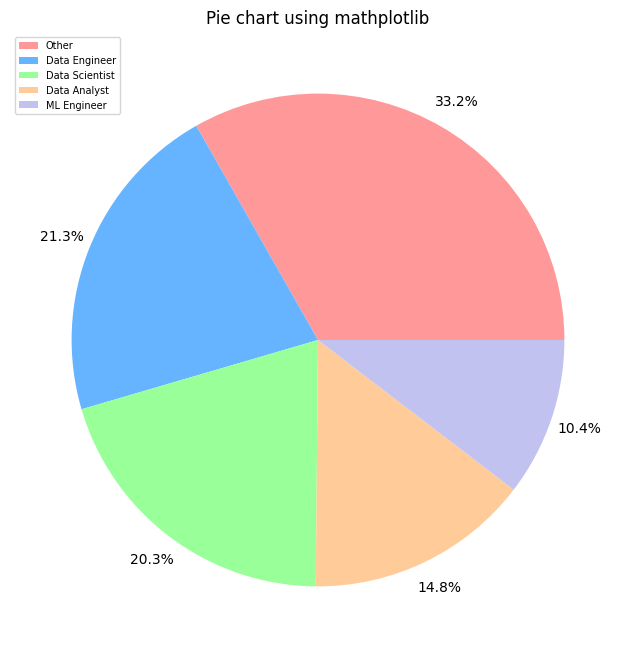

In [17]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
plt.figure(figsize=(8, 8))
plt.pie(df["job_title"].value_counts(),
        autopct='%1.1f%%',
        pctdistance=1.12,
        colors=colors[:len(df["job_title"].value_counts())])
plt.legend(labels=df["job_title"].value_counts().index, loc='upper left', fontsize=7)
plt.title('Pie chart using mathplotlib')

plt.show()
# we used matplotlib to create the pie chart.

# 5. Using matplotlib to create the pie chart and seaborn to change colors.

Create the pie chart using matplotlib and seaborn to add colors

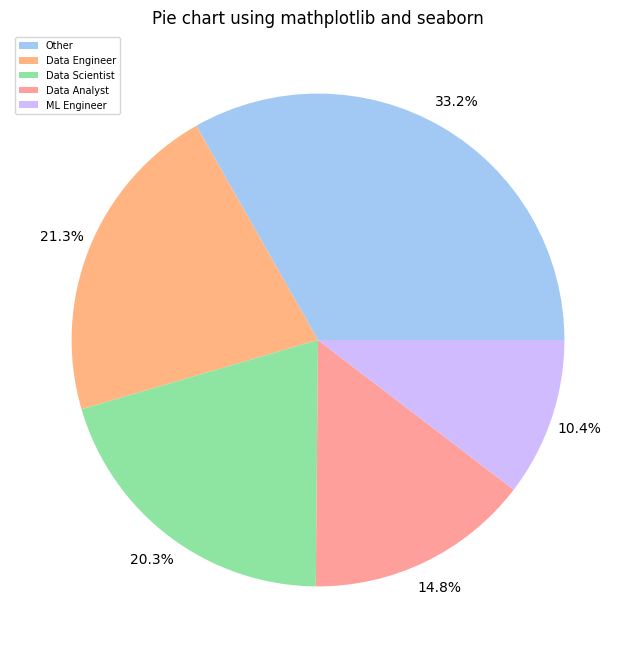

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(df["job_title"].value_counts(),autopct='%1.1f%%',pctdistance=1.12, colors=sns.color_palette("pastel"))
plt.legend(labels=df["job_title"].value_counts().index, loc='upper left', fontsize=7)
plt.title('Pie chart using mathplotlib and seaborn')

plt.show()

# we used matplotlib to create the pie chart and seaborn to change colors.
#,pctdistance=1.12

# 6. we can draw another chart to display the same data (barplot)

<Axes: xlabel='job_title', ylabel='count'>

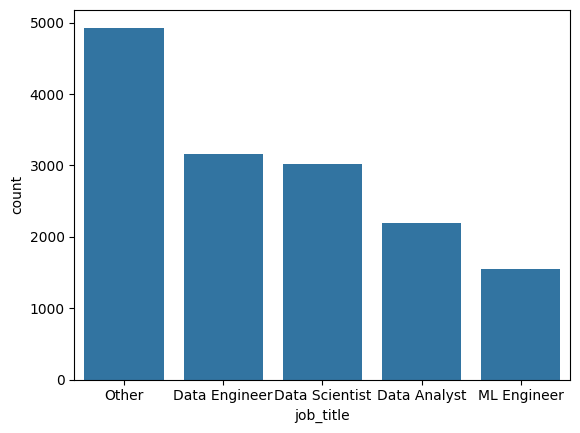

In [19]:
# we can draw another chart to display the same data (barplot)
sns.barplot(x=df["job_title"].value_counts().index,y=df["job_title"].value_counts())

# 7. create a boxplot to show the relationship between the salary and experience level

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

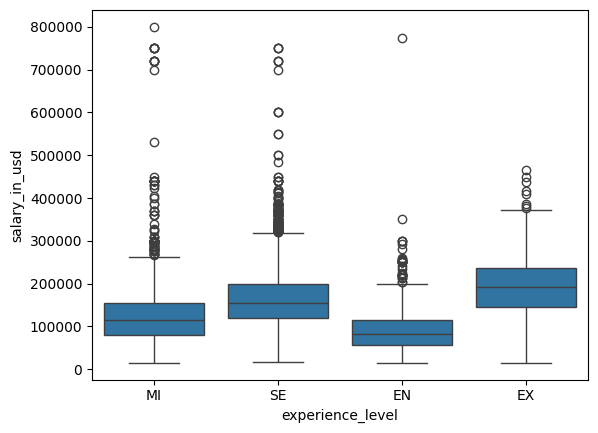

In [20]:
# create a boxplot to show the relationship between the salary and experience level
sns.boxplot(x=df["experience_level"],y=df["salary_in_usd"])

# 8. Word cloud plot

In [21]:
stopwords = set(STOPWORDS)

In [22]:
plt.figure(figsize=(20, 18))

<Figure size 2000x1800 with 0 Axes>

<Figure size 2000x1800 with 0 Axes>

## Instantiate a word cloud object

In [23]:
employee_job_title = WordCloud()

 ## Generate the word cloud from job titles column

In [24]:
# generate the word cloud
employee_job_title.generate(str(df.job_title_distict.tolist()))

## Display the cloud

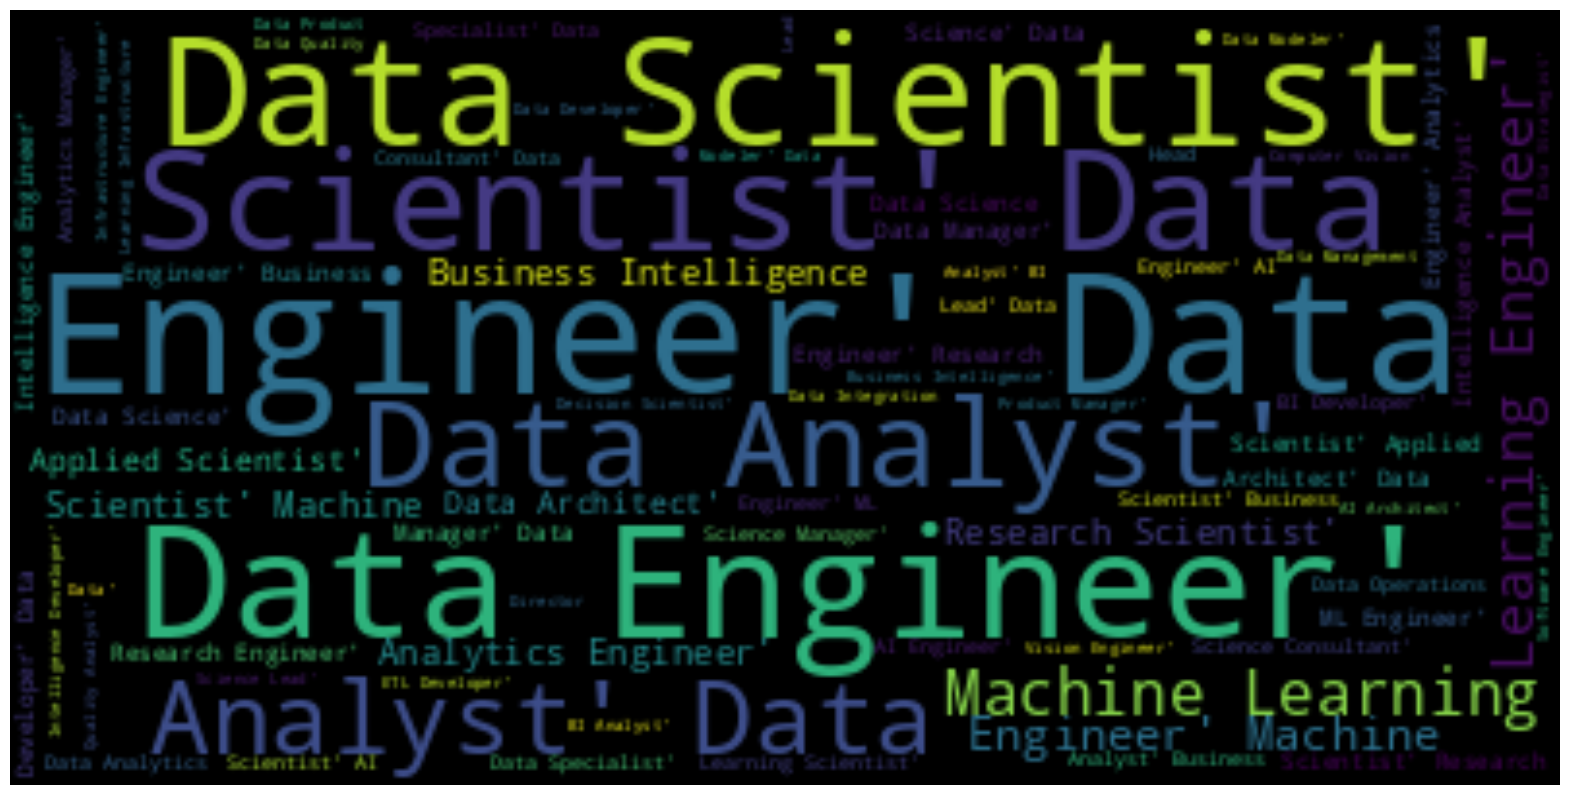

In [25]:

# display the cloud
plt.figure(figsize=(20, 18))
plt.imshow(employee_job_title, interpolation='bilinear')
plt.axis('off')
plt.show()

# 9. Waffle Chart Plot

In [26]:
#import Waffle from pywaffle
from pywaffle import Waffle

In [27]:
df_el = df.groupby('experience_level').size().reset_index(name='counts')
print(df_el)

  experience_level  counts
0               EN    1148
1               EX     441
2               MI    3553
3               SE    9696


## Set up the Waffle chart figure

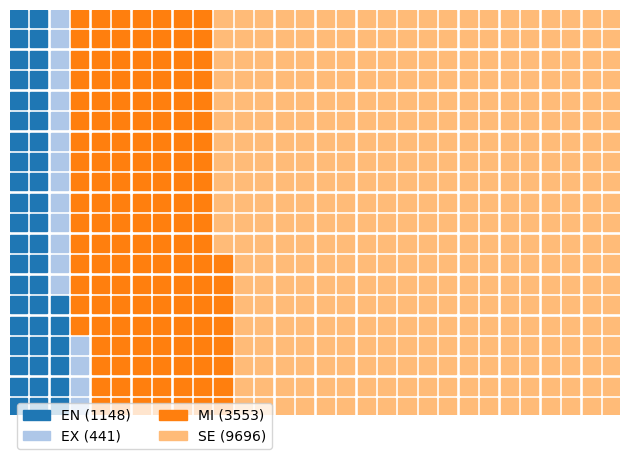

In [28]:
# Set up the Waffle chart figure

fig_waffle = plt.figure(FigureClass=Waffle,
                 rows=20, columns=30,
                 values=df_el['counts'],
                 cmap_name='tab20',
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_el.experience_level,df_el.counts)],
                        'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 2})

plt.show()

# 10. Dashboard

In [29]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import io
import matplotlib.pyplot as plt
from io import BytesIO
import base64


# Initialize the Dash app
app = dash.Dash(__name__)


# List of years
year_list = [i for i in range(2020, 2024, 1)]

# Create the layout of the app
app.layout = html.Div([
    html.H1("Global Data Science Salaries Dashboard",
            style={'textAlign': 'center', 'color': 'blue'}),
    html.Div(["Input Year: ", dcc.Input(id='input-year', value='2020',
                                        type='number', style={'height': '35px', 'font-size': 30}), ],
             style={'font-size': 30}),

    html.Br(),
    html.Br(),

    # Segment 1
    html.Div([
        html.Div(dcc.Graph(id='pie-plot')),
        html.Div(dcc.Graph(id='box-plot'))
    ], style={'display': 'flex'}),

    # Segment 2
    html.Div([
        html.Div(dcc.Graph(id='wordcloud-plot')),
        html.Div(dcc.Graph(id='bar_plot'))
    ], style={'display': 'flex'}),

])


@app.callback([
    Output('pie-plot', 'figure'),
    Output('box-plot', 'figure'),
    Output('wordcloud-plot', 'figure'),
    Output('bar_plot', 'figure')
],
    Input('input-year', 'value')
)
def get_graph(entered_year):
    global df

    # Filter DataFrame by year
    filtered_df = df[df['work_year'] == int(entered_year)] if entered_year else df

    # Pie Chart for Job Title Distribution
    pie_fig = px.pie(
        filtered_df,
        names=filtered_df["job_title"].value_counts().index,
        values=filtered_df["job_title"].value_counts().values,
        title='Job Title Distribution',
        color_discrete_sequence=px.colors.sequential.RdBu
    )

    # Box Plot for Renumeration and Experience Level
    box_fig = px.box(
        filtered_df,
        x='experience_level',
        y='salary_in_usd',
        title='Remuneration by Experience Level'
    )

    # Word Cloud for Job Titles
    text = " ".join(filtered_df["job_title"])

    wordcloud = WordCloud(background_color='white').generate(text)

    # Convert Word Cloud to Plotly Image
    fig_wordcloud = go.Figure()
    fig_wordcloud.add_trace(go.Image(z=wordcloud.to_array()))


    # Waffle Chart Placeholder (use a real Plotly waffle chart implementation here)
    avg_salary_jb_title = df.groupby('job_title')["salary_in_usd"].mean().sort_values(ascending=False).reset_index()
    # Create bar chart
    bar_fig = px.bar(
        avg_salary_jb_title,
        x='job_title',
        y='salary_in_usd',
        title="Average Salary by Job Title",
        labels={'salary_in_usd': 'Average Salary (USD)', 'job_title': 'Job Title'},
        text_auto=True
    )

    return pie_fig, box_fig, fig_wordcloud,bar_fig


if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>